In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
players = pd.read_csv('Fifa 23 Players Data.csv')

In [3]:
#to check the shape and types of the dataset
players.shape


(18539, 89)

In [4]:
players.dtypes

Known As          object
Full Name         object
Overall            int64
Potential          int64
Value(in Euro)     int64
                   ...  
RWB Rating         int64
LB Rating          int64
CB Rating          int64
RB Rating          int64
GK Rating          int64
Length: 89, dtype: object

In [5]:
#We also want to check if there is null data
players.isnull().value_counts()
#I don't see missing values

Known As  Full Name  Overall  Potential  Value(in Euro)  Positions Played  Best Position  Nationality  Image Link  Age    Height(in cm)  Weight(in kg)  TotalStats  BaseStats  Club Name  Wage(in Euro)  Release Clause  Club Position  Contract Until  Club Jersey Number  Joined On  On Loan  Preferred Foot  Weak Foot Rating  Skill Moves  International Reputation  National Team Name  National Team Image Link  National Team Position  National Team Jersey Number  Attacking Work Rate  Defensive Work Rate  Pace Total  Shooting Total  Passing Total  Dribbling Total  Defending Total  Physicality Total  Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  Curve  Freekick Accuracy  LongPassing  BallControl  Acceleration  Sprint Speed  Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  Standing Tackle  Sliding Tackle  Goalkeeper Diving  Goalkeeper Handling   GoalkeeperKick

In [6]:
#What are the columns?
players.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [7]:
pd.set_option('display.max_columns', None)
players.head()


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [8]:
players.duplicated().value_counts()

False    18420
True       119
dtype: int64

In [9]:
#Let's drop the duplicates from the dataframe
players = players.drop_duplicates()
players.shape

(18420, 89)

In [10]:
#Because there are 89 colums in this dataset, we cannot see all of them in the preview. We want to save all the most valuable columns and remove the rest.
#'Known As' and 'Full name' give the same amount of information, and I will only keep 'Full name'
#Possible valuable columns:'Overall', 'Potential', 'Value(in Euro), 'Postions Played', 'Best Position','Age','Club Name', 'Wage(in Euro)', 'Release clause' 'Pace Total', 'Shooting Total', 'Passing Total','Dribbling Total', 'Defending Total', 'Physicality Total'
#The 6 total characteristics following also have linear regression tendency, which makes sense because they are reflected in 'Overall'. So we don't particularly dive into the 6 abilities 
'''We are running the business for AC Milan club and we want to find out how to improve the performance of the club and maximize the profit in the following year.
Here are the things we need to accomplish:
1. We need to find out how much we over spent on certain players by using a model to predict the wage;
2. For those players we over spent, we need to see if it is profitable to sign a contract to new players to replace these ones;
'''

'We are running the business for AC Milan club and we want to find out how to improve the performance of the club and maximize the profit in the following year.\nHere are the things we need to accomplish:\n1. We need to find out how much we over spent on certain players by using a model to predict the wage;\n2. For those players we over spent, we need to see if it is profitable to sign a contract to new players to replace these ones;\n'

In [11]:
#Train Test split
train_players = players[players['Club Name'] != 'AC Milan']
columns_to_select = [
    'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
    'Best Position', 'Age', 'Wage(in Euro)', 'Release Clause']

all_players = train_players[columns_to_select]

In [12]:
all_players.head()

,Full Name,Overall,Potential,Value(in Euro),Best Position,Age,Wage(in Euro),Release Clause
0,Lionel Messi,91,91,54000000,CAM,35,195000,99900000
1,Karim Benzema,91,91,64000000,CF,34,450000,131199999
2,Robert Lewandowski,91,91,84000000,ST,33,420000,172200000
3,Kevin De Bruyne,91,91,107500000,CM,31,350000,198900000
4,Kylian Mbappé,91,95,190500000,ST,23,230000,366700000


In [13]:
all_players.describe()

,Overall,Potential,Value(in Euro),Age,Wage(in Euro),Release Clause
count,18389.000000,18389.000000,1.838900e+04,18389.000000,18389.000000,1.838900e+04
mean,65.773397,70.944043,2.809888e+06,25.243080,8655.647398,4.961608e+06
std,6.755080,6.154673,7.550728e+06,4.723641,19348.757275,1.452883e+07
min,47.000000,48.000000,0.000000e+00,16.000000,0.000000,0.000000e+00
25%,62.000000,67.000000,4.750000e+05,21.000000,1000.000000,6.600000e+05
50%,66.000000,71.000000,9.750000e+05,25.000000,3000.000000,1.500000e+06
75%,70.000000,75.000000,1.900000e+06,29.000000,7000.000000,3.300000e+06
max,91.000000,95.000000,1.905000e+08,44.000000,450000.000000,3.667000e+08


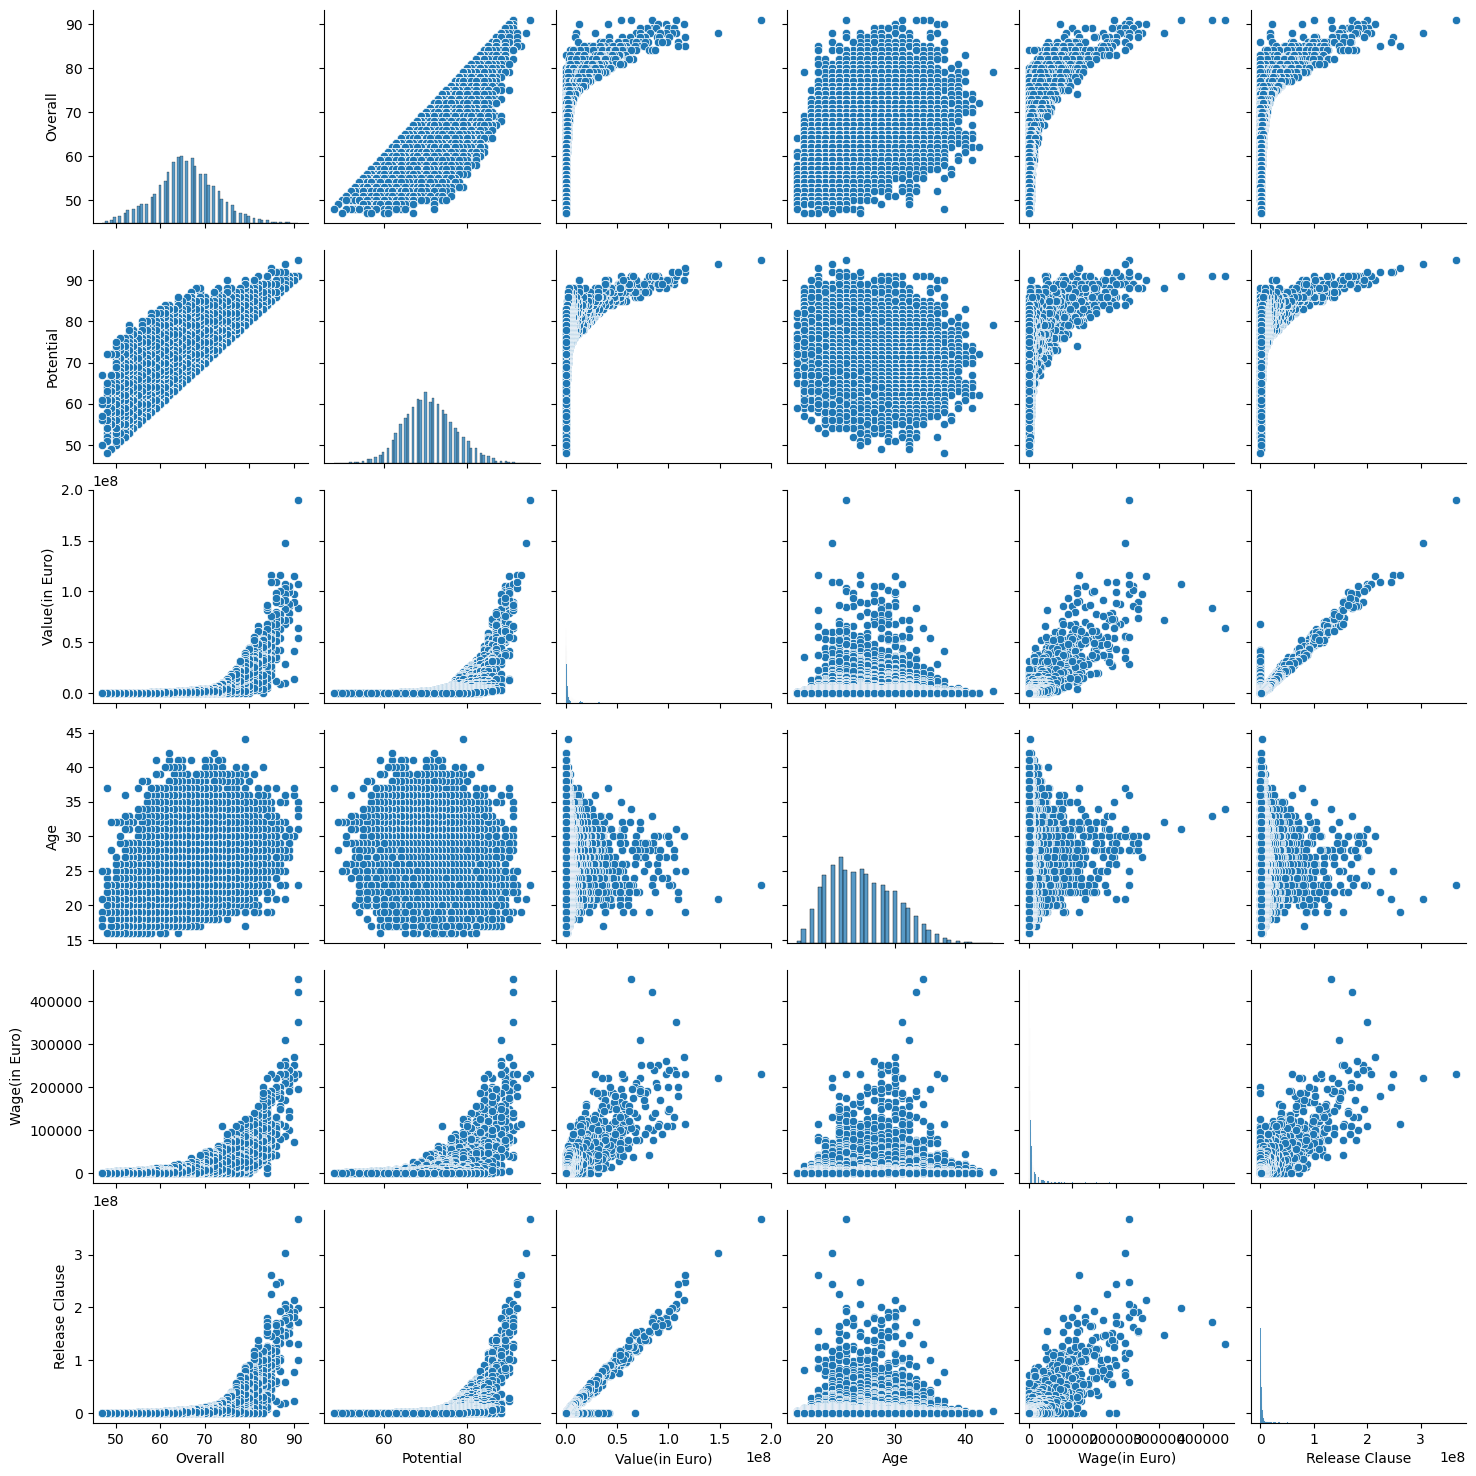

In [14]:
'''We first need to create a model to predict Wage(in Euro) so that we can calculate whether we are overpaying our players. To do that we first check what independent variables could be influcing the target "Wage(in Euro) '''
sns.pairplot(data= all_players)

In [15]:
'''Based on the pair plot, we can see that 'Overall', 'Poential', 'Value(in Euro), 'Age', and 'Release Clause' are having some patterns compared to 'Wage(in Euro)',
 among which 'Age' to 'Wage(in Euro) has a bell shape relation. 
 'Overall', 'Potential' and 'Age' also are reflected on "Value(in Euro)' of the player because this is a gerneral rule for sports; Release Clause is also highly dependent on 'Value(in Euro)' of course, so we also do not put it in the independent model.
'''

'Based on the pair plot, we can see that \'Overall\', \'Poential\', \'Value(in Euro), \'Age\', and \'Release Clause\' are having some patterns compared to \'Wage(in Euro)\',\n among which \'Age\' to \'Wage(in Euro) has a bell shape relation. \n \'Overall\', \'Potential\' and \'Age\' also are reflected on "Value(in Euro)\' of the player because this is a gerneral rule for sports; Release Clause is also highly dependent on \'Value(in Euro)\' of course, so we also do not put it in the independent model.\n'

In [16]:

all_players[['Age', 'Overall','Potential', 'Value(in Euro)', 'Wage(in Euro)']].corr()
#Value has the strongest influence among all the numerical columns selected. The second one is Overall


,Age,Overall,Potential,Value(in Euro),Wage(in Euro)
Age,1.000000,0.447817,-0.263631,0.034281,0.146318
Overall,0.447817,1.000000,0.655557,0.558880,0.595625
Potential,-0.263631,0.655557,1.000000,0.527918,0.492191
Value(in Euro),0.034281,0.558880,0.527918,1.000000,0.824500
Wage(in Euro),0.146318,0.595625,0.492191,0.824500,1.000000


In [19]:
# We categorize "Best positions" into 4 groups Forwards, Defenders, Goal Keepers and Midfielders for easier reference:
position_by_category = {
    'CAM': 'Midfielders',
    'CF': 'Forwards',
    'ST': 'Forwards',
    'CM': 'Midfielders',
    'RW': 'Forwards',
    'GK': 'Goalkeepers',
    'CB': 'Defenders',
    'LW': 'Forwards',
    'CDM': 'Midfielders',
    'LM': 'Midfielders',
    'LB': 'Defenders',
    'RM': 'Midfielders',
    'RB': 'Defenders',
    'LWB': 'Defenders',
    'RWB': 'Defenders'
}
all_players["Category"] = all_players["Best Position"].map(position_by_category)
all_players.head()

C:\Users\ruoxi\AppData\Local\Temp\ipykernel_15368\3426080606.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_players["Category"] = all_players["Best Position"].map(position_by_category)


,Full Name,Overall,Potential,Value(in Euro),Best Position,Age,Wage(in Euro),Release Clause,Category
0,Lionel Messi,91,91,54000000,CAM,35,195000,99900000,Midfielders
1,Karim Benzema,91,91,64000000,CF,34,450000,131199999,Forwards
2,Robert Lewandowski,91,91,84000000,ST,33,420000,172200000,Forwards
3,Kevin De Bruyne,91,91,107500000,CM,31,350000,198900000,Midfielders
4,Kylian Mbappé,91,95,190500000,ST,23,230000,366700000,Forwards


In [21]:
#Remove the orignial "Best position"
all_players.drop(columns='Best Position', inplace= True)

C:\Users\ruoxi\AppData\Local\Temp\ipykernel_15368\2795245174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_players.drop(columns='Best Position', inplace= True)


In [22]:
#Based on the descibe information, we keep the extreme data outside of our investigation
all_players.value_counts(all_players['Wage(in Euro)']>300000)

Wage(in Euro)
False    18385
True         4
dtype: int64

In [23]:
#There are also players with wage or value equal to 0, those players need to be out of the model building as well
cleaned_all_players = all_players[(all_players['Value(in Euro)']>0)& (all_players['Age'] <= 40) & (all_players['Wage(in Euro)'] <300000)&(all_players['Wage(in Euro)'] >0)]

In [24]:
cleaned_all_players.shape

(18275, 8)

In [25]:
cleaned_all_players.head()

,Full Name,Overall,Potential,Value(in Euro),Age,Wage(in Euro),Release Clause,Category
0,Lionel Messi,91,91,54000000,35,195000,99900000,Midfielders
4,Kylian Mbappé,91,95,190500000,23,230000,366700000,Forwards
5,Mohamed Salah,90,90,115500000,30,270000,213700000,Forwards
6,Thibaut Courtois,90,91,90000000,30,250000,191300000,Goalkeepers
7,Manuel Neuer,90,90,13500000,36,72000,22300000,Goalkeepers


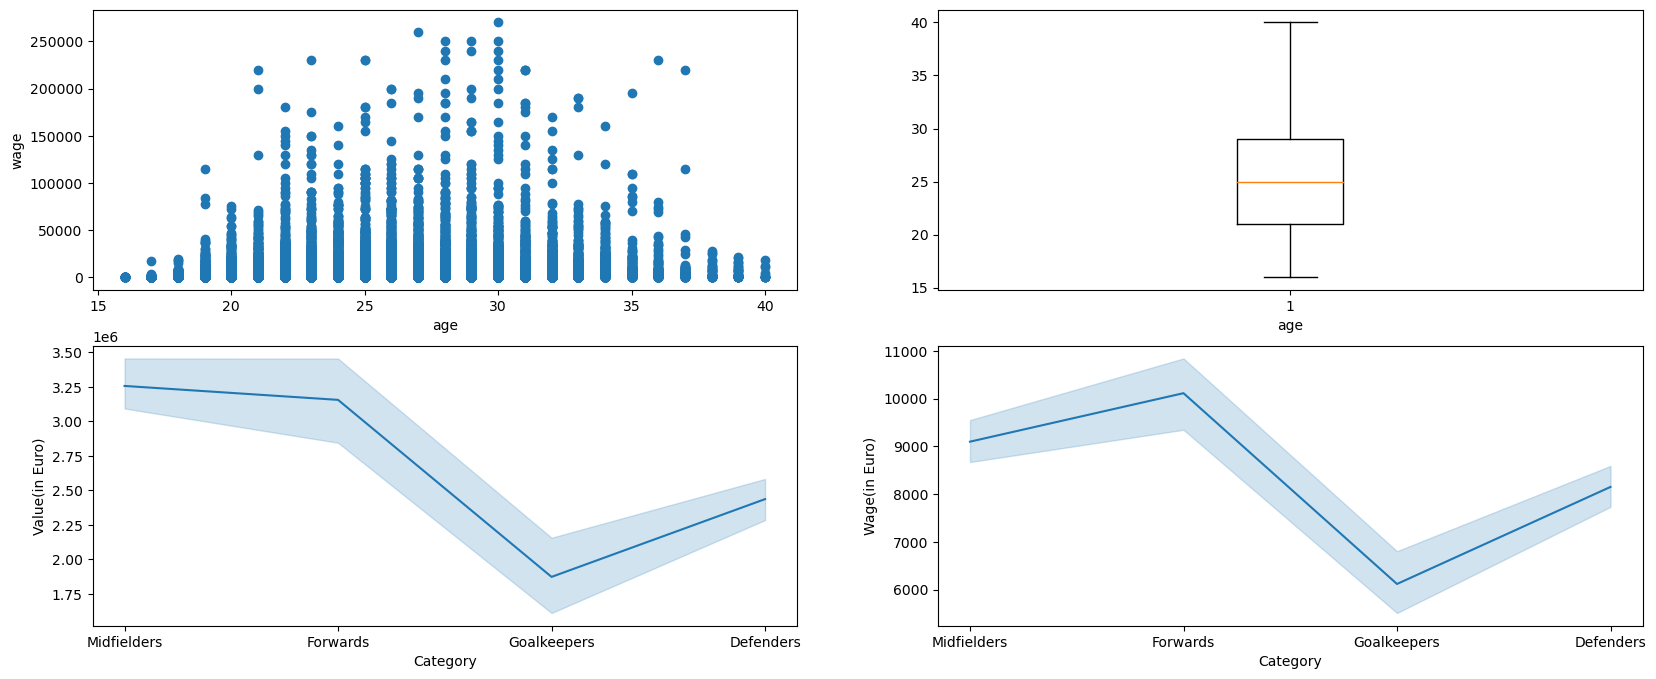

In [26]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20, 8))
plt.sca(ax[0, 0])
plt.scatter(cleaned_all_players['Age'], cleaned_all_players['Wage(in Euro)'])
plt.xlabel('age')
plt.ylabel('wage')
plt.sca(ax[0, 1])
plt.boxplot(cleaned_all_players['Age'])
plt.xlabel('age')
plt.sca(ax[1, 0])
sns.lineplot(cleaned_all_players, x= 'Category', y= 'Value(in Euro)')
plt.sca(ax[1, 1])
sns.lineplot(cleaned_all_players, x= 'Category', y= 'Wage(in Euro)')
plt.show()
#Value to Vategory and Wage to Category share relatively the same shape

In [27]:
'''As far as the correlation matrix says, to avoid multicollinearity in our regression model, and to reduce the amount of unnecessary independant varibles to avoid overfitting.'''
'''We want to see if the position of the player is refected in the Value.'''
wage_position = cleaned_all_players.groupby('Category')[['Wage(in Euro)']].agg('median').reset_index()
value_position = cleaned_all_players.groupby('Category')[['Value(in Euro)']].agg('median').reset_index()
cleaned_all_position = pd.merge(left= wage_position, right=value_position, on='Category')

display(cleaned_all_position)

,Category,Wage(in Euro),Value(in Euro)
0,Defenders,3000.0,950000.0
1,Forwards,3000.0,1100000.0
2,Goalkeepers,2000.0,525000.0
3,Midfielders,3000.0,1100000.0


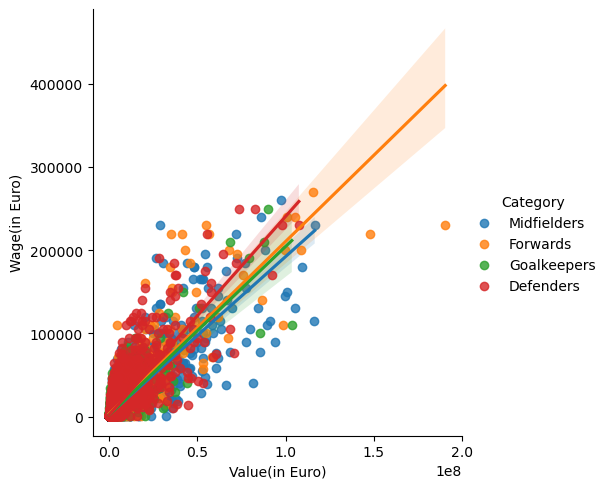

In [29]:
sns.lmplot(x="Value(in Euro)", y="Wage(in Euro)", hue="Category", data=cleaned_all_players)
#The regression lines do not seem to significantly different from each other

In [30]:
#Before building our model, we first want to standardize the independent variable
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
cleaned_all_players[['std_overall', 'std_potential', 'std_value']] = scaler.fit_transform(cleaned_all_players[['Overall','Potential', 'Value(in Euro)']])

C:\Users\ruoxi\AppData\Local\Temp\ipykernel_15368\2851570335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_all_players[['std_overall', 'std_potential', 'std_value']] = scaler.fit_transform(cleaned_all_players[['Overall','Potential', 'Value(in Euro)']])
C:\Users\ruoxi\AppData\Local\Temp\ipykernel_15368\2851570335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_all_players[['std_overall', 'std_potential', 'std_value']] = scaler.fit_transform(cleaned_all_players[['Overall','Potential'

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
wage_model = LinearRegression()
wage_result = wage_model.fit(cleaned_all_players[['std_overall', 'std_value']], cleaned_all_players['Wage(in Euro)'])
print(wage_result.intercept_)
print(wage_result.coef_)
print(wage_result.score(cleaned_all_players[['std_overall','std_value']], cleaned_all_players['Wage(in Euro)']))



8618.757865937068
[ 3966.34962404 13112.11597396]
0.7133240572284634


In [33]:
#Out of curiosity I want to see if I include "Category" in the model, would the R2 score looks better
'''First we use one-hot encoding to process the categorical column "Best Position". pd.get_dummies will just convert categorical variables and it won't touch numerical'''
enc_position = pd.get_dummies(cleaned_all_players[['std_overall', 'std_value','Category']])
test_model = LinearRegression()
test_result = test_model.fit(enc_position, cleaned_all_players['Wage(in Euro)'])
test_result.score(enc_position, cleaned_all_players['Wage(in Euro)'])
#The result does not really improve the R2 compared to the model with only 'std_overall' and 'std_value', so we'll use the first model built for the prediction 

0.7135679954017674

In [34]:
#Redo the standardization but overall
players[['std_overall', 'std_value']] = scaler.fit_transform(players[['Overall', 'Value(in Euro)']])
ac_milan = players[players['Club Name'] == 'AC Milan']


In [37]:
pd.set_option('display.max.columns', None)
columns_needed = ['Full Name', 'Overall', 'Potential', 'Value(in Euro)', 'Best Position','Age', 'Wage(in Euro)', 'Release Clause', 'Contract Until', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'std_overall', 'std_value']
ac_milan=ac_milan[columns_needed]
ac_milan["Category"] = ac_milan["Best Position"].map(position_by_category)
ac_milan.drop(columns='Best Position', inplace= True)
ac_milan

,Full Name,Overall,Potential,Value(in Euro),Age,Wage(in Euro),Release Clause,Contract Until,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,std_overall,std_value,Category
37,Mike Maignan,87,90,80000000,26,90000,142000000,2026,85,82,85,89,51,85,3.132508,10.092449,Goalkeepers
86,Theo Hernández,85,90,76000000,24,82000,134900000,2026,93,72,76,81,78,83,2.837087,9.569235,Defenders
128,Rafael da Conceição Leão,84,90,66500000,23,90000,126400000,2024,91,77,73,86,27,74,2.689376,8.326601,Forwards
131,Sandro Tonali,84,90,62500000,22,75000,118800000,2027,81,73,81,79,79,82,2.689376,7.803387,Midfielders
145,Fikayo Tomori,84,90,60500000,24,75000,115000000,2027,86,40,60,66,86,81,2.689376,7.541780,Defenders
222,Ismaël Bennacer,82,86,40000000,24,63000,71000000,2024,77,68,80,86,77,76,2.393955,4.860307,Midfielders
249,Zlatan Ibrahimović,82,82,0,40,63000,0,2023,58,85,76,77,34,72,2.393955,-0.371835,Forwards
255,Olivier Giroud,82,82,13000000,35,66000,22100000,2023,42,83,72,73,42,78,2.393955,1.328611,Forwards
256,Simon Kjær,82,82,14500000,33,73000,24700000,2024,62,54,64,60,84,78,2.393955,1.524817,Defenders
395,Davide Calabria,80,83,25500000,25,60000,45300000,2025,79,57,70,74,79,73,2.098534,2.963656,Defenders


In [38]:
# We want to get profile of AC_milan team by position category :
milan_category = ac_milan.groupby('Category').agg({'Full Name': 'count', 'Overall':"median","Potential":"median","Wage(in Euro)":"median","Age":"median","Value(in Euro)":"median"})
milan_category

# What we can see from below summary is that we have more spare in defenders and forwards compared to other position group.
# This is to keep in mind when making transfer decisions.

,Full Name,Overall,Potential,Wage(in Euro),Age,Value(in Euro)
Category,,,,,,
Defenders,11,78.0,82.0,60000.0,24.0,12500000.0
Forwards,8,79.0,82.0,64000.0,27.5,12250000.0
Goalkeepers,3,76.0,76.0,25000.0,36.0,825000.0
Midfielders,9,78.0,85.0,58000.0,22.0,22500000.0


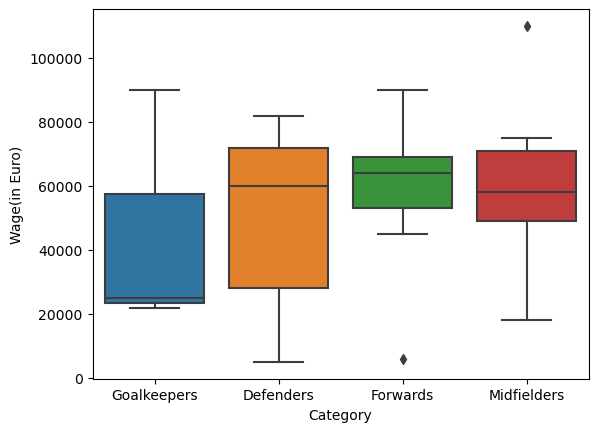

In [39]:
sns.boxplot(data=ac_milan,x="Category",y="Wage(in Euro)")
plt.show()

In [40]:
ac_milan.describe()

,Overall,Potential,Value(in Euro),Age,Wage(in Euro),Release Clause,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,std_overall,std_value
count,31.000000,31.000000,3.100000e+01,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,77.387097,82.387097,2.230484e+07,25.741935,54677.419355,3.681316e+07,73.870968,65.419355,69.806452,74.354839,60.677419,72.870968,1.712580,2.545717
std,5.777412,4.984492,2.342698e+07,5.773316,25910.598985,4.462820e+07,12.021486,14.366104,9.829952,9.928237,18.070947,7.860203,0.853385,3.064333
min,60.000000,74.000000,0.000000e+00,18.000000,5000.000000,0.000000e+00,42.000000,33.000000,39.000000,39.000000,27.000000,50.000000,-0.855679,-0.371835
25%,75.000000,78.500000,5.400000e+06,22.000000,34500.000000,3.350000e+06,66.500000,55.500000,66.000000,71.000000,46.500000,70.000000,1.359980,0.334504
50%,78.000000,82.000000,1.300000e+07,24.000000,60000.000000,2.130000e+07,76.000000,70.000000,73.000000,77.000000,66.000000,73.000000,1.803112,1.328611
75%,82.000000,85.500000,2.900000e+07,28.000000,72000.000000,4.785000e+07,82.500000,75.500000,76.000000,81.000000,74.500000,78.000000,2.393955,3.421468
max,87.000000,90.000000,8.000000e+07,40.000000,110000.000000,1.420000e+08,93.000000,85.000000,85.000000,89.000000,86.000000,85.000000,3.132508,10.092449


<Axes: xlabel='Category', ylabel='Wage(in Euro)'>

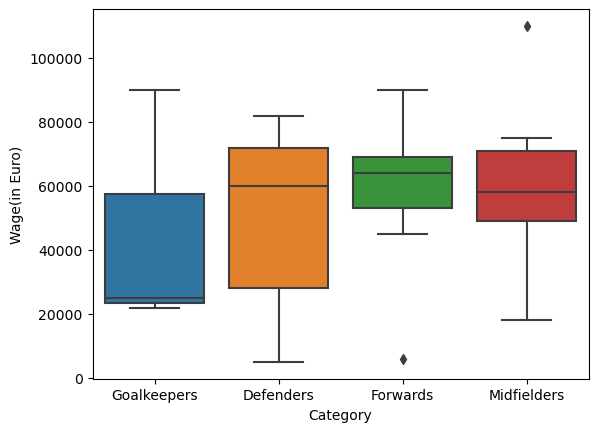

In [41]:
sns.boxplot(ac_milan, x='Category', y= 'Wage(in Euro)')
#Goalkeepers is positively skewed in the club and less paid compared to the other 3 position


In [42]:
'''Then we want to see how the distribution of our club players are compared to the prediction regression model'''
ac_milan['predicted_wage'] =wage_model.predict(ac_milan[['std_overall', 'std_value']])
ac_milan

,Full Name,Overall,Potential,Value(in Euro),Age,Wage(in Euro),Release Clause,Contract Until,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,std_overall,std_value,Category,predicted_wage
37,Mike Maignan,87,90,80000000,26,90000,142000000,2026,85,82,85,89,51,85,3.132508,10.092449,Goalkeepers,153376.745053
86,Theo Hernández,85,90,76000000,24,82000,134900000,2026,93,72,76,81,78,83,2.837087,9.569235,Defenders,145344.555625
128,Rafael da Conceição Leão,84,90,66500000,23,90000,126400000,2024,91,77,73,86,27,74,2.689376,8.326601,Forwards,128465.125877
131,Sandro Tonali,84,90,62500000,22,75000,118800000,2027,81,73,81,79,79,82,2.689376,7.803387,Midfielders,121604.680526
145,Fikayo Tomori,84,90,60500000,24,75000,115000000,2027,86,40,60,66,86,81,2.689376,7.541780,Defenders,118174.457850
222,Ismaël Bennacer,82,86,40000000,24,63000,71000000,2024,77,68,80,86,77,76,2.393955,4.860307,Midfielders,81842.931347
249,Zlatan Ibrahimović,82,82,0,40,63000,0,2023,58,85,76,77,34,72,2.393955,-0.371835,Forwards,13238.477834
255,Olivier Giroud,82,82,13000000,35,66000,22100000,2023,42,83,72,73,42,78,2.393955,1.328611,Forwards,35534.925226
256,Simon Kjær,82,82,14500000,33,73000,24700000,2024,62,54,64,60,84,78,2.393955,1.524817,Defenders,38107.592233
395,Davide Calabria,80,83,25500000,25,60000,45300000,2025,79,57,70,74,79,73,2.098534,2.963656,Defenders,55802.072872


In [43]:
#We are looking for players who have less predicted wage, and contract unil is more than 2023
overpaid = ac_milan[(ac_milan['predicted_wage']*3/2<ac_milan['Wage(in Euro)']) & (ac_milan['Contract Until']> '2023')]
overpaid

,Full Name,Overall,Potential,Value(in Euro),Age,Wage(in Euro),Release Clause,Contract Until,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,std_overall,std_value,Category,predicted_wage
256,Simon Kjær,82,82,14500000,33,73000,24700000,2024,62,54,64,60,84,78,2.393955,1.524817,Defenders,38107.592233
471,Ante Rebić,80,80,21000000,28,78000,35700000,2025,86,80,74,81,48,80,2.098534,2.375040,Forwards,48084.071851
642,Alessandro Florenzi,79,79,12500000,31,60000,21300000,2025,76,77,79,79,74,61,1.950823,1.263210,Defenders,32919.753441
710,Junior Messias,78,78,11500000,31,65000,19600000,2024,84,73,73,81,49,60,1.803112,1.132406,Forwards,30618.770065
1036,Rade Krunić,77,77,10500000,28,58000,17900000,2025,67,73,76,77,72,72,1.655402,1.001602,Midfielders,28317.786689
1110,Divock Origi,76,77,9000000,27,56000,16000000,2026,79,75,67,75,27,73,1.507691,0.805397,Forwards,25159.247643
3030,Malick Thiaw,72,83,4800000,20,24000,9100000,2027,73,47,60,65,71,73,0.916848,0.256022,Defenders,15612.291870
3114,Fodé Ballo-Touré,72,76,3000000,25,32000,5300000,2025,85,51,67,71,67,72,0.916848,0.020576,Defenders,12525.091462
5037,Matteo Gabbia,70,79,3300000,22,22000,6300000,2026,52,33,47,56,74,71,0.621427,0.059817,Defenders,11867.880787
15250,Luca Stanga,60,74,550000,20,5000,1300000,2024,56,34,39,39,62,61,-0.855679,-0.299893,Defenders,1292.604222


In [44]:
underpaid = ac_milan[(ac_milan['predicted_wage']*2/3>ac_milan['Wage(in Euro)'])]
underpaid

,Full Name,Overall,Potential,Value(in Euro),Age,Wage(in Euro),Release Clause,Contract Until,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,std_overall,std_value,Category,predicted_wage
37,Mike Maignan,87,90,80000000,26,90000,142000000,2026,85,82,85,89,51,85,3.132508,10.092449,Goalkeepers,153376.745053
86,Theo Hernández,85,90,76000000,24,82000,134900000,2026,93,72,76,81,78,83,2.837087,9.569235,Defenders,145344.555625
131,Sandro Tonali,84,90,62500000,22,75000,118800000,2027,81,73,81,79,79,82,2.689376,7.803387,Midfielders,121604.680526
145,Fikayo Tomori,84,90,60500000,24,75000,115000000,2027,86,40,60,66,86,81,2.689376,7.541780,Defenders,118174.457850


In [45]:
'''All of the underpaid players are having good potential ratings, and they are in the career peak (age between 20 to 30) which is the reason we need to raise the wage of them'''
#For the next 52 weeks, we will raise the wage of the underpaid players, and the total amount would be:
dif_wage_under = (underpaid['predicted_wage'] - underpaid['Wage(in Euro)']).agg('sum')*52
dif_wage_under

11258022.830768444

In [46]:
#We can have a look how the other clubs are doing in terms of the Wage paid, and we are on the rank of 13 
sum_wage_club = players.groupby(players['Club Name'])['Wage(in Euro)'].agg(sum).reset_index().sort_values(by="Wage(in Euro)", ascending= False)
sum_wage_club.head(20)

,Club Name,Wage(in Euro)
495,Real Madrid CF,4250500
400,Manchester City,3669650
230,FC Barcelona,3533000
389,Liverpool,3188000
401,Manchester United,3073000
134,Chelsea,2921000
355,Juventus,2357000
612,Tottenham Hotspur,2244000
454,Paris Saint-Germain,2223500
429,Newcastle United,1755000


In [47]:
#If we calculate the average wage, we are on the rank of 15
avg_wage_club = players.groupby(players['Club Name'])['Wage(in Euro)'].agg('mean').reset_index().sort_values(by="Wage(in Euro)", ascending= False)
avg_wage_club.head(20)

,Club Name,Wage(in Euro)
400,Manchester City,135912.962963
495,Real Madrid CF,128803.030303
230,FC Barcelona,107060.606061
389,Liverpool,106266.666667
134,Chelsea,94225.806452
401,Manchester United,93121.212121
454,Paris Saint-Germain,85519.230769
355,Juventus,78566.666667
612,Tottenham Hotspur,77379.310345
232,FC Bayern München,68681.818182


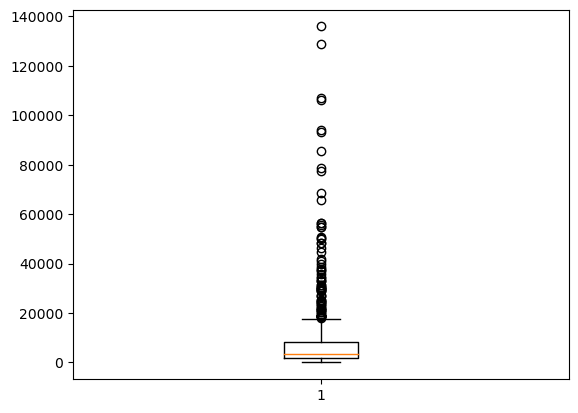

In [48]:
plt.boxplot(avg_wage_club['Wage(in Euro)'])
plt.show()

In [52]:
##Although we do not have enough data to make a concrete decision on the transfer, we do have some strategy regarding new players selection
## Our criteria : find young players (<27 yrs old), who has high potential ranking and the curent overall is above our team average (same position category)
## We will favor players that meet criteria above and doesnot have release clause 
## Example code for a LW players selection :
# Filter top 3 "LW" players with "Release Clause" < "Value(in Euro)" and age<27
filtered_LW = players[(players['Best Position'] == 'LW') & (players['Release Clause'] ==0) & (players['Age'] < 27)]

# Sort the filtered DataFrame by "Overall" in descending order
sorted_LW = filtered_LW.sort_values(by='Overall', ascending=False)

# Extract the top 3 players
top_3_players = sorted_LW.head(5)

# Display the top 3 players
display(top_3_players)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,std_overall,std_value
2057,N. Radonjić,Nemanja Radonjić,74,75,5000000,"LW,RW,CF",LW,Serbia,https://cdn.sofifa.net/players/243/656/23_60.png,26,185,76,1781,390,Torino F.C.,34000,0,LF,2023,49,2018,TRUE,Right,4,3,1,-,-,-,-,High,Low,88,71,69,74,30,58,70,69,49,70,74,76,68,54,66,73,89,88,75,73,71,76,45,67,60,73,43,22,69,71,57,71,31,30,23,7,9,14,13,6,72,74,73,73,73,74,75,75,68,75,57,53,57,54,44,54,18,1.212270,0.282183
3120,C. Tzolis,Christos Tzolis,72,80,5000000,"LW,RW",LW,Greece,https://cdn.sofifa.net/players/256/948/23_60.png,20,184,73,1839,389,FC Twente,25000,0,LW,2023,19,2021,TRUE,Right,4,4,1,-,https://cdn.sofifa.net/flags/gr.png,-,-,High,Medium,86,69,63,73,35,63,65,70,68,67,70,74,71,63,50,71,87,86,80,66,75,66,63,67,57,68,72,29,71,63,66,69,28,35,38,15,10,12,6,10,72,72,71,71,71,72,72,72,64,72,58,53,58,56,50,56,18,0.916848,0.282183
4943,A. Ezzalzouli,Abdessamad Ezzalzouli,70,82,3800000,"LW,RW",LW,Morocco,https://cdn.sofifa.net/players/264/432/23_60.png,20,177,73,1581,352,CA Osasuna,46000,0,SUB,2023,12,2021,TRUE,Right,3,4,1,-,https://cdn.sofifa.net/flags/ma.png,-,-,Medium,Medium,80,61,59,77,27,48,59,62,34,61,49,80,65,40,52,76,82,79,78,66,77,65,42,44,56,59,34,18,64,62,53,68,25,32,28,7,5,6,12,9,66,70,68,68,68,70,70,70,61,70,52,47,52,48,40,48,16,0.621427,0.125219
5207,M. Johnston,Michael Johnston,70,75,2400000,"LW,RW",LW,Scotland,https://cdn.sofifa.net/players/238/505/23_60.png,23,178,66,1697,362,Vitória de Guimarães,26000,0,SUB,2023,90,2016,TRUE,Right,3,4,1,-,https://cdn.sofifa.net/flags/gb-sct.png,-,-,Medium,Medium,85,64,63,74,29,47,62,63,51,65,57,74,68,63,50,72,84,85,88,59,85,67,58,62,46,64,27,20,65,67,57,64,32,27,25,10,15,9,8,12,67,70,68,68,68,70,70,70,62,70,54,47,54,50,40,50,18,0.621427,-0.057906
5455,T. Fosu,Tariqe Fosu,69,69,1500000,"LW,CAM,RWB",LW,Ghana,https://cdn.sofifa.net/players/216/483/23_60.png,26,172,67,1737,385,Stoke City,22000,0,RWB,2023,24,2020,TRUE,Right,3,4,1,-,https://cdn.sofifa.net/flags/gh.png,-,-,Medium,Medium,80,64,64,71,45,61,67,67,39,66,44,70,54,47,63,70,82,78,79,65,77,62,52,68,65,64,45,43,65,64,57,66,56,42,34,11,13,9,12,7,66,69,67,67,67,69,69,69,66,69,61,58,61,58,52,58,19,0.473717,-0.175630
